In [ ]:
#EXERCISE - LONDON CRIME#
#apa perubahan jumlah kasus dari 2011 ke 2016?

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
data.drop(['lsoa_code','minor_category','month'], axis=1, inplace=True)
data.head(5)

,borough,major_category,value,year
0,Croydon,Burglary,0,2016
1,Greenwich,Violence Against the Person,0,2016
2,Bromley,Violence Against the Person,0,2015
3,Redbridge,Burglary,0,2016
4,Wandsworth,Robbery,0,2008


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   value           int64 
 3   year            int64 
dtypes: int64(2), object(2)
memory usage: 411.7+ MB


In [8]:
data.isnull().sum()

borough           0
major_category    0
value             0
year              0
dtype: int64

In [9]:
data.columns.values 

array(['borough', 'major_category', 'value', 'year'], dtype=object)

In [10]:
data.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [11]:
data.shape

(13490604, 4)

In [ ]:
#tahun 2011 - 2016, daerah manakah yang memiliki jumlah tindak kriminal paling tinggi?

In [12]:
data_borough = data[(data['year']>2010)].groupby(['year','borough']).agg({'value': 'sum'})
data_borough.head()

value
year borough                    
2011 Barking and Dagenham  16686
     Barnet                24007
     Bexley                11325
     Brent                 27669
     Bromley               19868

In [57]:
data_borough = data.reset_index()[['borough', 'value']].groupby(['borough']).agg({'value': 'sum'})
data_borough.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


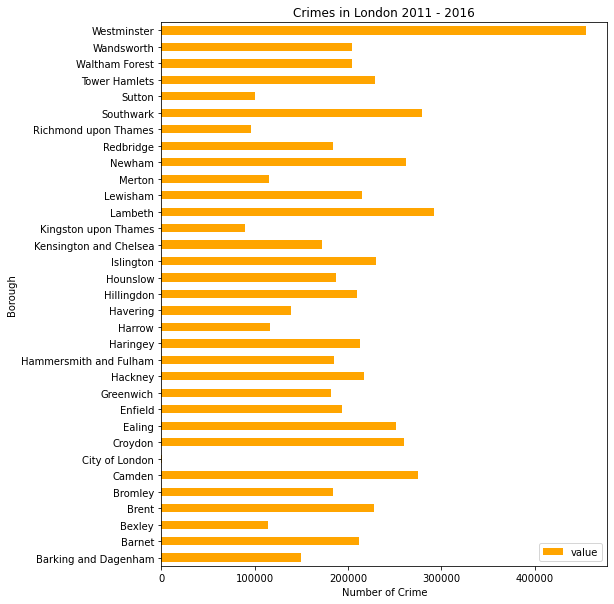

In [61]:
data_borough.plot(kind = 'barh', figsize=(8,10), color='orange')
plt.title('Crimes in London 2011 - 2016')
plt.xlabel('Number of Crime')
plt.ylabel('Borough')
plt.show()

In [ ]:
#Westminster adalah daerah dengan kejadian tindak kriminal tertinggi di London sepanjang tahun 2011-2016 dengan angka kejadian lebih dari 400.000 kasus.
#City of London adalah daerah dengan kejadian tindak kriminal terendah di London sepanjang tahun 2011-2016 dengan angka kejadian sangat kecil, yaitu kurang dari 10.000 kasus.

In [31]:
majorcrime = data[(data['year'] > 2010)].groupby(['year','major_category']).agg({'value': 'sum'})
majorcrime.head()

value
year major_category                  
2011 Burglary                   93315
     Criminal Damage            70914
     Drugs                      57550
     Fraud or Forgery               0
     Other Notifiable Offences  10264

In [32]:
data.tail()

,borough,major_category,value,year
13490599,Brent,Criminal Damage,0,2015
13490600,Hillingdon,Robbery,1,2015
13490601,Sutton,Burglary,0,2011
13490602,Croydon,Robbery,0,2011
13490603,Merton,Violence Against the Person,0,2015


In [44]:
majorcrime = data.reset_index()[['major_category','value']].groupby(['major_category']).agg({'value': 'sum'})
majorcrime.head()

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349


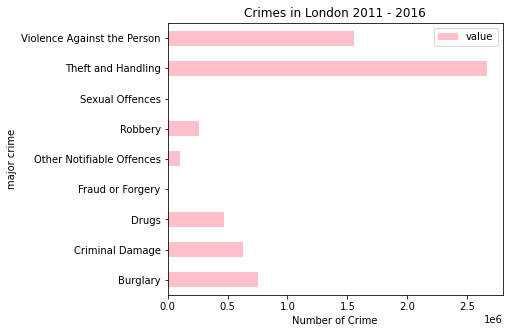

In [51]:
majorcrime.plot(kind = 'barh', figsize=(6,5), color='pink')
plt.title('Crimes in London 2011 - 2016')
plt.xlabel('Number of Crime')
plt.ylabel('major crime')
plt.show()

In [54]:
#theft and Handling adalah kejahatan tertinggi di tahun 2011 - 2016
#sexual offences adalah kejahatan terendah di tahun 2011 - 2016

majorcrime.info

<bound method DataFrame.info of                                value
major_category                      
Burglary                      754293
Criminal Damage               630938
Drugs                         470765
Fraud or Forgery                5325
Other Notifiable Offences     106349
Robbery                       258873
Sexual Offences                 1273
Theft and Handling           2661861
Violence Against the Person  1558081>